## Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Data Set


In [15]:
data = pd.read_csv('Transaction.csv')

In [16]:
data

,Transaction ID,Payer Name,Entity Type (Payer),Receiver Name,Entity Type (Receiver),Transaction Details,Transaction Amount Threshold,Transaction Frequency,Jurisdiction Risk,Shell Company Detection,Beneficial Ownership Transparency,Sanctions & Watchlist Screening,Round-Number Transactions,Politically Exposed Persons (PEP) Involvement,Unusual Transaction Timing,Industry-Specific Risk Factors,Risk Score
0,TXN3001,James Hardie Industries,Corporation,Azek Company,Corporation,Acquisition of Azek,5,4,3,6,3,4,8,2,4,8,17
1,TXN3002,Google (Alphabet Inc.),Corporation,Wiz,Private Company,Acquisition of cloud security startup,3,8,5,6,2,6,8,3,8,4,21
2,TXN3003,Ecovyst,Corporation,Cornerstone Chemical Co.,Corporation,Acquisition of sulfuric acid production assets,1,8,3,9,3,2,2,5,3,6,15
3,TXN3004,Synopsys,Corporation,Ansys,Corporation,Acquisition to enhance engineering simulation ...,7,5,2,4,6,1,9,1,9,8,22
4,TXN3005,HPE,Corporation,Juniper Networks,Corporation,Acquisition to bolster networking capabilities,7,2,5,7,9,4,2,4,7,7,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,TXN6081,ExxonMobil,Corporation,Carbon Capture Tech Startups,Multiple Companies,Climate initiative funding,3,5,4,3,9,4,5,4,5,5,16
96,TXN6082,Ed Sheeran,Celebrity,Notting Hill Music,Private Company,Music rights acquisition,6,4,3,5,7,3,6,3,4,5,13
97,TXN6083,Tesla,Corporation,Lithium Mines,Multiple Companies,Raw material supply deals,9,8,7,8,2,7,9,7,8,9,33
98,TXN6084,Billie Eilish,Celebrity,Gucci,Corporation,Sustainable fashion campaign,3,7,2,2,8,2,3,2,2,3,10


# Exploratory Data Analysis

In [ ]:
print(data.describe())

       Transaction Amount Threshold  Transaction Frequency  Jurisdiction Risk  \
count                    100.000000             100.000000         100.000000   
mean                       5.650000               6.470000           4.560000   
std                        2.475639               1.976912           2.421787   
min                        1.000000               1.000000           1.000000   
25%                        4.000000               5.000000           3.000000   
50%                        6.000000               7.000000           4.000000   
75%                        8.000000               8.000000           6.000000   
max                       10.000000              10.000000          10.000000   

       Shell Company Detection  Beneficial Ownership Transparency  \
count               100.000000                         100.000000   
mean                  5.560000                           5.420000   
std                   2.239769                           2.2481

In [ ]:
print(data.isnull().sum())
print(data.duplicated().sum())
data = data.dropna()
data = data.drop_duplicates()

Transaction ID                                   0
Payer Name                                       0
Entity Type (Payer)                              0
Receiver Name                                    0
Entity Type (Receiver)                           0
Transaction Details                              0
Transaction Amount Threshold                     0
Transaction Frequency                            0
Jurisdiction Risk                                0
Shell Company Detection                          0
Beneficial Ownership Transparency                0
Sanctions & Watchlist Screening                  0
Round-Number Transactions                        0
Politically Exposed Persons (PEP) Involvement    0
Unusual Transaction Timing                       0
Industry-Specific Risk Factors                   0
Risk Score                                       0
dtype: int64
0


<Axes: ylabel='Risk Score'>

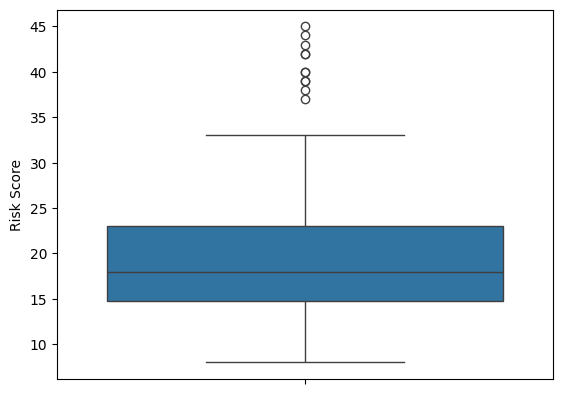

In [ ]:
import seaborn as sns
sns.boxplot(data['Risk Score'])

In [ ]:
features = [
    'Transaction Amount Threshold', 'Transaction Frequency', 'Jurisdiction Risk',
    'Shell Company Detection', 'Beneficial Ownership Transparency',
    'Sanctions & Watchlist Screening', 'Round-Number Transactions',
    'Politically Exposed Persons (PEP) Involvement', 'Unusual Transaction Timing',
    'Industry-Specific Risk Factors'
]

# Create a new Risk Category column based on Total Risk Score
def categorize_risk(score):
    if score >= 30:
        return "High"
    elif score >= 15:
        return "Medium"
    else:
        return "Low"

data["Risk Category"] = data["Risk Score"].apply(categorize_risk)


In [ ]:
data


,Transaction ID,Payer Name,Entity Type (Payer),Receiver Name,Entity Type (Receiver),Transaction Details,Transaction Amount Threshold,Transaction Frequency,Jurisdiction Risk,Shell Company Detection,Beneficial Ownership Transparency,Sanctions & Watchlist Screening,Round-Number Transactions,Politically Exposed Persons (PEP) Involvement,Unusual Transaction Timing,Industry-Specific Risk Factors,Risk Score,Risk Category
0,TXN3001,James Hardie Industries,Corporation,Azek Company,Corporation,Acquisition of Azek,5,4,3,6,3,4,8,2,4,8,17,Medium
1,TXN3002,Google (Alphabet Inc.),Corporation,Wiz,Private Company,Acquisition of cloud security startup,3,8,5,6,2,6,8,3,8,4,21,Medium
2,TXN3003,Ecovyst,Corporation,Cornerstone Chemical Co.,Corporation,Acquisition of sulfuric acid production assets,1,8,3,9,3,2,2,5,3,6,15,Medium
3,TXN3004,Synopsys,Corporation,Ansys,Corporation,Acquisition to enhance engineering simulation ...,7,5,2,4,6,1,9,1,9,8,22,Medium
4,TXN3005,HPE,Corporation,Juniper Networks,Corporation,Acquisition to bolster networking capabilities,7,2,5,7,9,4,2,4,7,7,18,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,TXN6081,ExxonMobil,Corporation,Carbon Capture Tech Startups,Multiple Companies,Climate initiative funding,3,5,4,3,9,4,5,4,5,5,16,Medium
96,TXN6082,Ed Sheeran,Celebrity,Notting Hill Music,Private Company,Music rights acquisition,6,4,3,5,7,3,6,3,4,5,13,Low
97,TXN6083,Tesla,Corporation,Lithium Mines,Multiple Companies,Raw material supply deals,9,8,7,8,2,7,9,7,8,9,33,High
98,TXN6084,Billie Eilish,Celebrity,Gucci,Corporation,Sustainable fashion campaign,3,7,2,2,8,2,3,2,2,3,10,Low


# Correlation Check


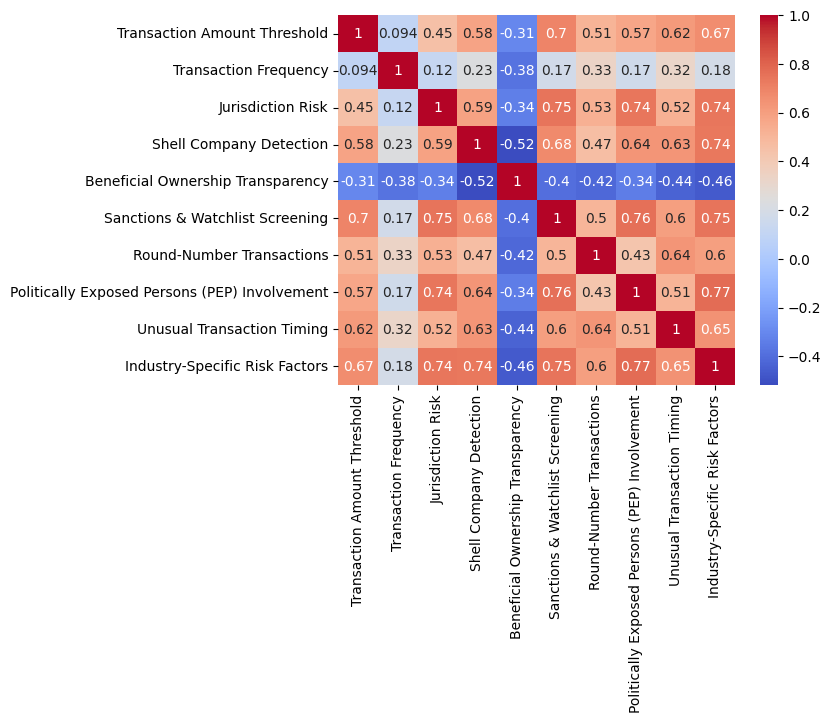

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
features_df = data[features]
sns.heatmap(features_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Training ML Model with the transaction dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_absolute_error

# Define inputs and outputs
X = data[features]
y_score = data["Risk Score"]
y_class = data["Risk Category"]

# Split into training and testing
X_train, X_test, y_score_train, y_score_test, y_class_train, y_class_test = train_test_split(
    X, y_score, y_class, test_size=0.2, random_state=42
)

# Train regression model for risk score
reg_model = RandomForestRegressor(random_state=42)
reg_model.fit(X_train, y_score_train)

# Train classifier model for risk category
clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train, y_class_train)

# Evaluate
score_preds = reg_model.predict(X_test)
class_preds = clf_model.predict(X_test)

print("Mean Absolute Error (Risk Score):", mean_absolute_error(y_score_test, score_preds))
print("Classification Report (Risk Category):\n", classification_report(y_class_test, class_preds))


Mean Absolute Error (Risk Score): 1.2010000000000003
Classification Report (Risk Category):
               precision    recall  f1-score   support

        High       1.00      1.00      1.00         4
         Low       0.50      0.25      0.33         4
      Medium       0.79      0.92      0.85        12

    accuracy                           0.80        20
   macro avg       0.76      0.72      0.73        20
weighted avg       0.77      0.80      0.77        20



# Taking input from the CSV File : Test Data: Book1.csv

In [ ]:
import pandas as pd

features = [
    "Transaction Amount Threshold", "Transaction Frequency", "Jurisdiction Risk",
    "Shell Company Detection", "Beneficial Ownership Transparency",
    "Sanctions & Watchlist Screening", "Round-Number Transactions",
    "Politically Exposed Persons (PEP) Involvement", "Unusual Transaction Timing",
    "Industry-Specific Risk Factors"
]

def risk_level(score):
    if score <= 3:
        return "Low"
    elif score <= 7:
        return "Medium"
    else:
        return "High"

def classify_entity(entity_name, shell_score):
    name = str(entity_name).lower()
    if "gov" in name or "ministry" in name or "department" in name:
        return "Government Agency"
    elif "foundation" in name or "ngo" in name or "non-profit" in name:
        return "Non-Profit"
    elif "corp" in name or "inc" in name or "ltd" in name or "company" in name:
        return "Corporation"
    elif shell_score >= 8:
        return "Shell Company"
    elif "pvt" in name or "private" in name:
        return "Private Company"
    else:
        return "Unknown"


df = pd.read_csv("Book1.csv")

X = df[features]

df["Predicted Risk Score"] = reg_model.predict(X).round(0).astype(int)
df["Predicted Risk Category"] = clf_model.predict(X)

for feature in features:
    df[feature + " Risk Level"] = df[feature].apply(risk_level)


df["Payer Entity Type"] = df.apply(lambda row: classify_entity(row["Payer Name"], row["Shell Company Detection"]), axis=1)
df["Receiver Entity Type"] = df.apply(lambda row: classify_entity(row["Receiver Name"], row["Shell Company Detection"]), axis=1)

df.to_csv("predicted_transactions.csv", index=False)
print("Output saved to predicted_transactions.csv")


Output saved to predicted_transactions.csv
